# <font color = "blue"></font>  Cricket Player Performance Prediction

# <font color = "red"> </font>

#### The data is scraped from ESPN Cricinfo, matches till 18th May 2019 are only counted. We need to  analyze the performance of all the players playing in CWC 2019.

##  Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
batter_df = pd.read_csv("Batsman_Data.csv")
bowler_df = pd.read_csv("Bowler_data.csv")
grnd_avg_df = pd.read_csv("Ground_Averages.csv")
odi_res_df = pd.read_csv("ODI_Match_Results.csv")
odi_tot_df = pd.read_csv("ODI_Match_Totals.csv")
wc_players_df = pd.read_csv("WC_players.csv")

In [3]:
batter_df.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6831,6832,38,38,48,79.16,4,0,v Zimbabwe,Auckland,14 Mar 2015,ODI # 3636,Virat Kohli,253802
2555,2556,31,31,49,63.26,3,0,v England,Johannesburg,12 Feb 2016,ODI # 3737,JP Duminy,44932
7999,8000,59,59,65,90.76,6,1,v Ireland,Dublin,25 Aug 2011,ODI # 3185,Eoin Morgan,24598
1937,1938,7,7,10,70.00,1,0,v Australia,Colombo (RPS),24 Aug 2016,ODI # 3769,Dhananjaya de Silva,465793
7292,7293,104,104,78,133.33,13,2,v New Zealand,Birmingham,9 Jun 2015,ODI # 3654,Joe Root,303669


In [4]:
bowler_df.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
8069,8070,-,-,-,-,-,-,-,v South Africa,Johannesburg,12 Feb 2016,ODI # 3737,Eoin Morgan,24598
5463,5464,10.0,0,35,1,3.50,35.00,60.0,v Australia,Pune,13 Oct 2013,ODI # 3419,Ravindra Jadeja,234675
324,325,-,-,-,-,-,-,-,v Afghanistan,Gros Islet,11 Jun 2017,ODI # 3887,Shai Hope,581379
1477,1478,-,-,-,-,-,-,-,v Pakistan,Abu Dhabi,25 Dec 2013,ODI # 3448,Kusal Perera,300631
2850,2851,-,-,-,-,-,-,-,v West Indies,Durban,16 Jan 2015,ODI # 3579,Hashim Amla,43906


In [5]:
grnd_avg_df.sample(5)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
91,"Greater Noida Sports Complex Ground, Greater N...",2017-2017,5,5,0,0,2629,79,2918,33.27,5.40
41,"Mannofield Park, Aberdeen - Scotland",2013-2014,3,3,0,0,1094,45,1316,24.31,4.98
98,"Old Hararians, Harare - Zimbabwe",2018-2018,5,5,0,0,2156,75,2522,28.74,5.12
6,"Brisbane Cricket Ground, Woolloongabba, Brisba...",2013-2018,8,8,0,0,3671,123,4189,29.84,5.25


In [6]:
odi_res_df.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
409,1024,won,21 runs,NaN,won,1st,v Zimbabwe,Dhaka,28 Nov 2014,ODI # 3555,Bangladesh,25
421,464,won,3 wickets,3.0,won,2nd,v New Zealand,Dubai (DSC),8 Dec 2014,ODI # 3564,Pakistan,7
692,634,lost,4 wickets,21.0,won,1st,v Australia,Wellington,6 Feb 2016,ODI # 3733,Newzealad,5
646,205,won,19 runs,NaN,won,2nd,v West Indies,Pallekele,7 Nov 2015,ODI # 3704,SriLanka,8
1128,1073,won,48 runs,NaN,won,1st,v West Indies,Providence,22 Jul 2018,ODI # 4022,Bangladesh,25


In [7]:
odi_tot_df.sample(5)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
175,1098,350/6,50.0,7.00,NaN,1,lost,v India,Nagpur,30 Oct 2013,ODI # 3424,Australia,2
785,772,241,48.4,4.95,261.0,2,lost,v New Zealand,Ranchi,26 Oct 2016,ODI # 3799,India,6
1090,1189,310/8,50.0,6.20,NaN,1,lost,v England,Chester-le-Street,21 Jun 2018,ODI # 4012,Australia,2
359,731,263/7,50.0,5.26,NaN,1,won,v West Indies,Delhi,11 Oct 2014,ODI # 3533,India,6
1290,1075,213/5,22.5,9.32,210.0,2,won,v West Indies,Dublin (Malahide),17 May 2019,ODI # 4137,Bangladesh,25


In [8]:
wc_players_df.sample(5)

,Player,ID,Country
133,Milinda Siriwardana,222354,SriLanka
67,Kedar Jadhav,290716,India
73,Hardik Pandya,625371,India
89,Ish Sodhi,559066,NewZealand
52,Alex Hales,249866,England


In [9]:
common = set.intersection(set(odi_res_df['Start Date']), set(odi_tot_df['Start Date']))

In [10]:
df = pd.concat([
    odi_res_df[odi_res_df['Start Date']. isin(common)],
    odi_tot_df[odi_tot_df['Start Date']. isin(common)]]).sort_values(by='Start Date')

In [11]:
c = set.intersection(set(odi_res_df['Start Date']), set(odi_tot_df['Start Date']),set(batter_df['Start Date']), set(bowler_df['Start Date']))
                     
                     
bat_boll_res_tot = pd.concat([
    odi_res_df[odi_res_df['Start Date']. isin(c)],
    odi_tot_df[odi_tot_df['Start Date']. isin(c)],
    batter_df[batter_df['Start Date'].isin(c)],
    bowler_df[bowler_df['Start Date'].isin(c)]]).sort_values(by='Start Date')

In [12]:
bat_boll_res_tot.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,...,SR,4s,6s,Batsman,Player_ID,Mdns,Wkts,Econ,Ave,Bowler
669,621,won,NaN,NaN,NaN,NaN,v Pakistan,Auckland,31 Jan 2016,ODI # 3730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5728,5729,NaN,NaN,NaN,NaN,NaN,v New Zealand,Mount Maunganui,28 Jan 2019,ODI # 4088,...,30.0,NaN,NaN,NaN,326016.0,1,2,4.60,23.00,Bhuvneshwar Kumar
1291,552,lost,80 runs,NaN,lost,2nd,v Australia,Abu Dhabi,27 Mar 2019,ODI # 4118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8606,8607,NaN,NaN,NaN,NaN,NaN,v West Indies,Sylhet,14 Dec 2018,ODI # 4073,...,-,NaN,NaN,NaN,56025.0,0,0,4.66,-,Mahmudullah
432,899,lost,87 runs,NaN,lost,2nd,v Sri Lanka,Colombo (RPS),16 Dec 2014,ODI # 3569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2597 non-null   int64  
 1   Result      2597 non-null   object 
 2   Margin      1301 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1301 non-null   object 
 5   Bat         1301 non-null   object 
 6   Opposition  2597 non-null   object 
 7   Ground      2597 non-null   object 
 8   Start Date  2597 non-null   object 
 9   Match_ID    2597 non-null   object 
 10  Country     2597 non-null   object 
 11  Country_ID  2597 non-null   int64  
 12  Score       1296 non-null   object 
 13  Overs       1296 non-null   float64
 14  RPO         1296 non-null   object 
 15  Target      620 non-null    float64
 16  Inns        1296 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 365.2+ KB


## Converting 'Start Date' into date/time data type

In [14]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [15]:
df['Start Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2597 entries, 891 to 790
Series name: Start Date
Non-Null Count  Dtype         
--------------  -----         
2597 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.6 KB


In [16]:
df.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
339,453,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Dambulla,2014-08-30,ODI # 3519,Pakistan,7,102,32.1,3.17,NaN,1.0
1151,965,n/r,NaN,NaN,NaN,NaN,v Sri Lanka,Dambulla,2018-10-10,ODI # 4052,England,1,92/2,15.0,6.13,NaN,1.0
7,836,won,NaN,NaN,NaN,NaN,v India,Rajkot,2013-01-11,ODI # 3318,England,1,325/4,50.0,6.50,NaN,1.0
606,622,lost,20 runs,NaN,won,2nd,v South Africa,Centurion,2015-08-19,ODI # 3676,Newzealad,5,NaN,NaN,NaN,NaN,NaN
318,312,won,75 runs,NaN,won,1st,v Sri Lanka,Colombo (RPS),2014-07-06,ODI # 3500,SouthAfrica,3,NaN,NaN,NaN,NaN,NaN


## Things we can do with df: Gather data induvidually based on Opposition, Ground

- Result vs Toss
- Margin vs Bat
- Target, result, ground - Lowest and Highest
- How many times has 'Country' won against 'Opposition' and for what score, RPO, Target

In [17]:
res_toss = df[['Result','Toss','Opposition','Ground']]

In [18]:
res_toss.sample(5)

,Result,Toss,Opposition,Ground
96,tied,NaN,v South Africa,Cardiff
381,lost,NaN,v South Africa,Perth
1279,n/r,NaN,v Pakistan,The Oval
996,won,NaN,v Ireland,Sharjah
1049,lost,won,v England,Brisbane


In [19]:
res_toss.isna().sum()

Result           0
Toss          1296
Opposition       0
Ground           0
dtype: int64

In [20]:
res_toss.dropna(inplace=True)

## VENUES - GROUNDS LIST

- The Oval, London
- Trent Bridge, Nottingham
- Sophia Gardens, Cardiff
- County Ground, Bristol
- Rose Bowl, Southampton
- County Ground, Taunton
- Old Trafford, Manchester
- Edgbaston, Birmingham
- Headingley, Leeds
- Lord's, London
- Riverside Ground, Chester-le-Street

## We are playing in the england  so we will analyse only england grounds

In [21]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

## Total Grounds 

In [22]:
wc_ground_state = []
ODI_grounds = odi_res_df.Ground

for grnd in ODI_grounds:
    for grnds in WC_venue_pitches:
        if grnd in grnds:
            wc_ground_state.append((grnd,grnds))

In [23]:
Ground_names = dict(set(wc_ground_state))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'The Oval': 'The Oval, London',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Bristol': 'County Ground, Bristol',
 'Manchester': 'Old Trafford, Manchester',
 "Lord's": "Lord's, London",
 'Leeds': 'Headingley, Leeds',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Birmingham': 'Edgbaston, Birmingham',
 'Southampton': 'Rose Bowl, Southampton'}

## Gathering the data of all ODI's in these WC Venues

In [24]:
WC_Grounds_History = odi_res_df[odi_res_df.Ground.isin([Ground[0] for Ground in wc_ground_state])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
75,566,won,5 wickets,19.0,won,2nd,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
76,860,lost,5 wickets,19.0,lost,1st,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
77,567,won,86 runs,NaN,won,1st,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
78,861,lost,86 runs,NaN,lost,2nd,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
79,568,lost,34 runs,NaN,won,2nd,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


So, now we have the data of matches that were played in WC venues. Now let's analyze the following things,

- How many WC teams have played in these venues before and what are they?
- Which Team has more Win Percentage in these Venues?
- Does Batting First helps winning in these Pitches?
- What should the captain opt for, when he wins the Toss?

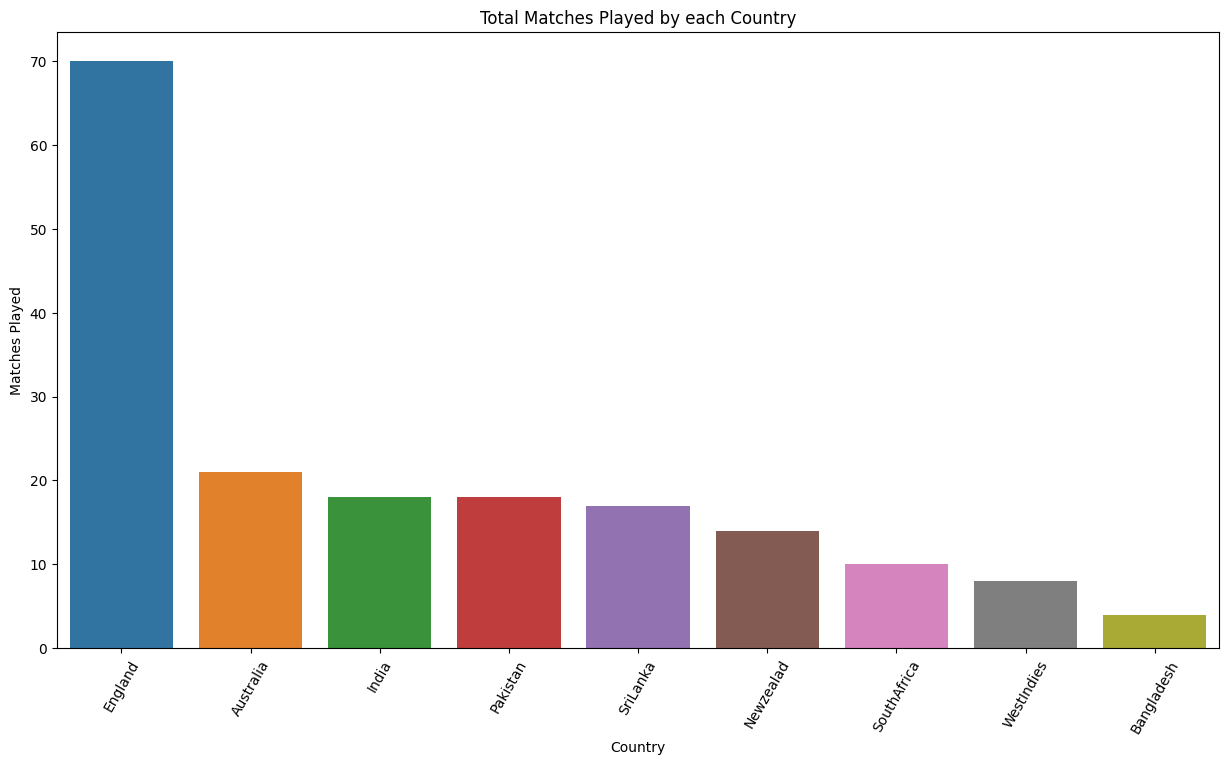

In [25]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)
plt.show()

- So, England has the benifit of Home conditions and even playing many matches over there, they will get used to those pitches and can understand the conditions of pitches very well.
- After England, it's Aussies which played many mathces in those conditions.

## Team wise winning percentage in england piches 

In [26]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
927,386,lost,19 runs,NaN,won,1st,v Pakistan,"Edgbaston, Birmingham",7 Jun 2017,ODI # 3881,SouthAfrica,3
620,921,lost,8 wickets,154.0,won,1st,v Australia,"Old Trafford, Manchester",13 Sep 2015,ODI # 3684,England,1
928,518,won,19 runs,NaN,lost,2nd,v South Africa,"Edgbaston, Birmingham",7 Jun 2017,ODI # 3881,Pakistan,7
1122,827,lost,8 wickets,33.0,lost,1st,v England,"Headingley, Leeds",17 Jul 2018,ODI # 4018,India,6
102,865,won,10 runs,NaN,lost,1st,v New Zealand,"Sophia Gardens, Cardiff",16 Jun 2013,ODI # 3373,England,1


In [27]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
aban     4
-        2
Name: Result, dtype: int64

- Seems like there are some unwanted datas in the dataset, removing those data.

In [28]:
WC_Grounds_History = WC_Grounds_History[~ WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
aban     4
Name: Result, dtype: int64

In [29]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,aban,4.761905
1,Australia,lost,52.380952
2,Australia,n/r,19.047619
3,Australia,won,23.809524
4,Bangladesh,lost,50.000000


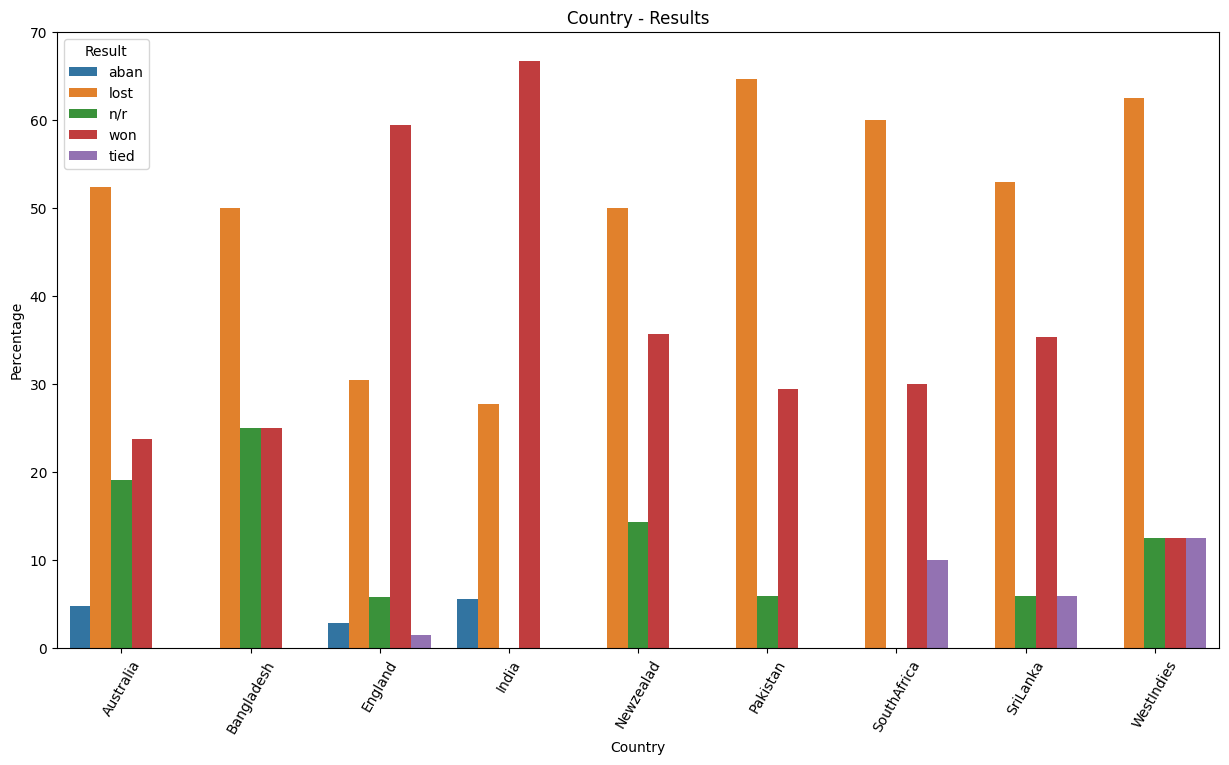

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)
plt.show()

From the above figure, we can understand that,

- India and England have the highest winning percentage compared to that of other Nations
- Pakistan, South Africa, West Indies have the Highest Losing Percentage.

Let's see what happens when the Top Two Teams face?

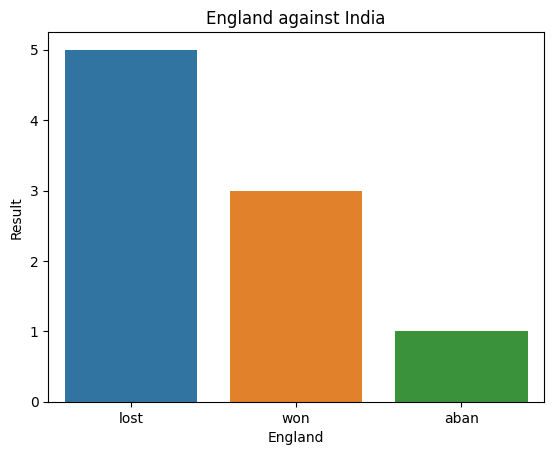

In [31]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")
plt.show()

In [32]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
915,955,won,8 wickets,16.0,won,2nd,v Bangladesh,"The Oval, London",1 Jun 2017,ODI # 3875,England,1
724,931,tied,-,NaN,won,2nd,v Sri Lanka,"Trent Bridge, Nottingham",21 Jun 2016,ODI # 3751,England,1
356,891,lost,9 wickets,117.0,lost,1st,v India,"Edgbaston, Birmingham",2 Sep 2014,ODI # 3523,England,1
987,87,lost,124 runs,NaN,won,2nd,v England,"County Ground, Bristol",24 Sep 2017,ODI # 3915,WestIndies,4
308,886,lost,7 runs,NaN,won,2nd,v Sri Lanka,"Lord's, London",31 May 2014,ODI # 3495,England,1


In [33]:
batter_df.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5250,5251,15,15,22,68.18,1,0,v Sri Lanka,Christchurch,11 Jan 2015,ODI # 3574,Kane Williamson,277906
5213,5214,13,13,18,72.22,0,0,v South Africa,Napier,29 Feb 2012,ODI # 3252,Kane Williamson,277906
2750,2751,46,46,59,77.96,6,0,v England,The Oval,29 Aug 2008,ODI # 2757,Hashim Amla,43906
975,976,0,0,1,0.00,0,0,v Bangladesh,Dambulla,28 Mar 2017,ODI # 3856,Nuwan Pradeep,324358
7927,7928,110*,110,55,200.00,6,9,v Pakistan,Southampton,11 May 2019,ODI # 4133,Jos Buttler,308967


In [34]:
batter_df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [35]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [36]:
batter_df['Runs'] = pd.to_numeric(batter_df['Runs'], errors='coerce').fillna(0).astype(int)
batter_df['SR'] = pd.to_numeric(batter_df['SR'], errors='coerce').fillna(0).astype(int)
batter_df['4s'] = pd.to_numeric(batter_df['4s'], errors='coerce').fillna(0).astype(int)
batter_df['6s'] = pd.to_numeric(batter_df['6s'], errors='coerce').fillna(0).astype(int)

In [37]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  int32 
 3   BF          11149 non-null  object
 4   SR          11149 non-null  int32 
 5   4s          11149 non-null  int32 
 6   6s          11149 non-null  int32 
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int32(4), int64(2), object(7)
memory usage: 958.2+ KB


In [38]:
batter_df.describe()

,Unnamed: 0,Runs,SR,4s,6s,Player_ID
count,11149.00000,11149.000000,11149.000000,11149.000000,11149.000000,1.114900e+04
mean,5575.00000,22.964391,62.098125,2.080635,0.431788,2.259088e+05
std,3218.58341,30.694241,54.666471,3.072333,1.077853,1.942613e+05
min,1.00000,0.000000,0.000000,0.000000,0.000000,5.334000e+03
25%,2788.00000,0.000000,0.000000,0.000000,0.000000,4.749200e+04
50%,5575.00000,10.000000,63.000000,1.000000,0.000000,2.335140e+05
75%,8362.00000,34.000000,94.000000,3.000000,0.000000,3.217770e+05
max,11149.00000,264.000000,600.000000,33.000000,16.000000,1.158100e+06


In [39]:
batter_df["Runs"].isnull().sum()

0

In [40]:
batter_df.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
9800,9801,74,74,95,77,5,2,v West Indies,Basseterre,13 Jun 2016,ODI # 3745,Steve Smith,267192
9411,9412,0,0,9,0,0,0,v India,Dhaka,24 Jun 2015,ODI # 3661,Mashrafe Mortaza,56007
8790,8791,21,21,28,75,3,0,v Zimbabwe,Dhaka,9 Nov 2015,ODI # 3705,Mushfiqur Rahim,56029
5890,5891,8*,8,15,53,1,0,v Zimbabwe,Harare,24 Jul 2013,ODI # 3395,Dinesh Karthik,30045
10988,10989,2,2,22,9,0,0,v Ireland,Sharjah,5 Dec 2017,ODI # 3935,Asghar Afghan,320652


In [41]:
batter_df.drop(batter_df[batter_df.Bat1 == 'DNB'].index, inplace=True)
batter_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [42]:
batter_df.shape

(9106, 13)

In [43]:
batter_df['Bat1'] = batter_df['Bat1'].str.replace('*', '.')
batter_df['SR'] = batter_df['SR'].replace('-', '0')
batter_df['Runs'] = batter_df['Runs'].replace('-', '0')
batter_df['4s'] = batter_df['4s'].replace('-', '0')
batter_df['6s'] = batter_df['6s'].replace('-', '0')
batter_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [44]:
batter_df['SR']=batter_df['SR'].astype(float)
batter_df['Runs']=batter_df['Runs'].astype(float)
batter_df['4s']=batter_df['4s'].astype(float)
batter_df['6s']=batter_df['6s'].astype(float)

In [45]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9106 entries, 5 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9106 non-null   int64  
 1   Bat1        9106 non-null   object 
 2   Runs        9106 non-null   float64
 3   BF          9106 non-null   object 
 4   SR          9106 non-null   float64
 5   4s          9106 non-null   float64
 6   6s          9106 non-null   float64
 7   Opposition  9106 non-null   object 
 8   Ground      9106 non-null   object 
 9   Start Date  9106 non-null   object 
 10  Match_ID    9106 non-null   object 
 11  Batsman     9106 non-null   object 
 12  Player_ID   9106 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 996.0+ KB


In [46]:
Top_10_batters = batter_df['Batsman'].value_counts()[:10]
Top_10_batters

MS Dhoni            294
Chris Gayle         288
Shoaib Malik        255
Virat Kohli         222
Ross Taylor         209
Mohammad Hafeez     208
Eoin Morgan         208
Rohit Sharma        202
Mushfiqur Rahim     194
Tamim Iqbal         193
Name: Batsman, dtype: int64

In [47]:
induvidual_player = batter_df.query('Batsman =="Virat Kohli "')
induvidual_player

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6676,6677,12,12.0,22,54.0,1.0,0.0,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat Kohli,253802
6677,6678,37,37.0,67,55.0,6.0,0.0,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat Kohli,253802
6678,6679,25,25.0,38,65.0,4.0,0.0,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat Kohli,253802
6679,6680,54,54.0,66,81.0,7.0,0.0,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat Kohli,253802
6680,6681,31,31.0,46,67.0,3.0,1.0,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat Kohli,253802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,6899,44,44.0,45,97.0,6.0,1.0,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Virat Kohli,253802
6899,6900,116,116.0,120,96.0,10.0,0.0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Virat Kohli,253802
6900,6901,123,123.0,95,129.0,16.0,1.0,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Virat Kohli,253802
6901,6902,7,7.0,6,116.0,1.0,0.0,v Australia,Mohali,10 Mar 2019,ODI # 4111,Virat Kohli,253802


In [48]:
print("The highest number of score for this batsman is: ")
print(induvidual_player['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(induvidual_player['SR'].max())
print("The most number of 4s for this batsman is: ")
print(induvidual_player['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(induvidual_player['6s'].max())

The highest number of score for this batsman is: 
183.0
The highest Strike Rate for this batsman is: 
209.0
The most number of 4s for this batsman is: 
22.0
The most number of 6s score for this batsman is: 
7.0


In [49]:
against_pak = induvidual_player.query('Opposition == "v Pakistan"')
against_pak

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6682,6683,16,16.0,24,66.0,1.0,0.0,v Pakistan,Centurion,26 Sep 2009,ODI # 2898,Virat Kohli,253802
6704,6705,18,18.0,27,66.0,1.0,0.0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Virat Kohli,253802
6728,6729,9,9.0,21,42.0,0.0,0.0,v Pakistan,Mohali,30 Mar 2011,ODI # 3147,Virat Kohli,253802
6760,6761,183,183.0,148,123.0,22.0,1.0,v Pakistan,Dhaka,18 Mar 2012,ODI # 3263,Virat Kohli,253802
6766,6767,0,0.0,5,0.0,0.0,0.0,v Pakistan,Chennai,30 Dec 2012,ODI # 3314,Virat Kohli,253802
6767,6768,6,6.0,9,66.0,1.0,0.0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Virat Kohli,253802
6768,6769,7,7.0,17,41.0,1.0,0.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Virat Kohli,253802
6776,6777,22.,22.0,27,81.0,3.0,0.0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Virat Kohli,253802
6808,6809,5,5.0,11,45.0,0.0,0.0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Virat Kohli,253802
6826,6827,107,107.0,126,84.0,8.0,0.0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Virat Kohli,253802


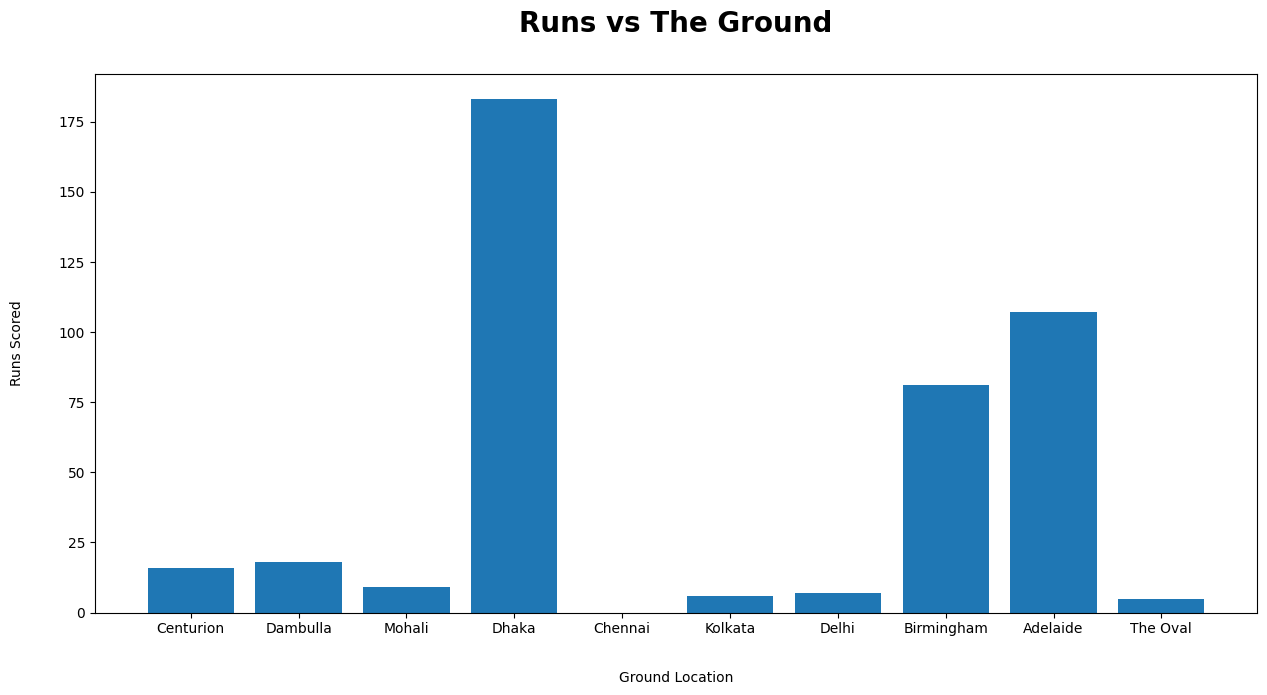

In [50]:
plt.figure(figsize=(15,7))
x = against_pak['Ground']
y = against_pak['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)
plt.show()

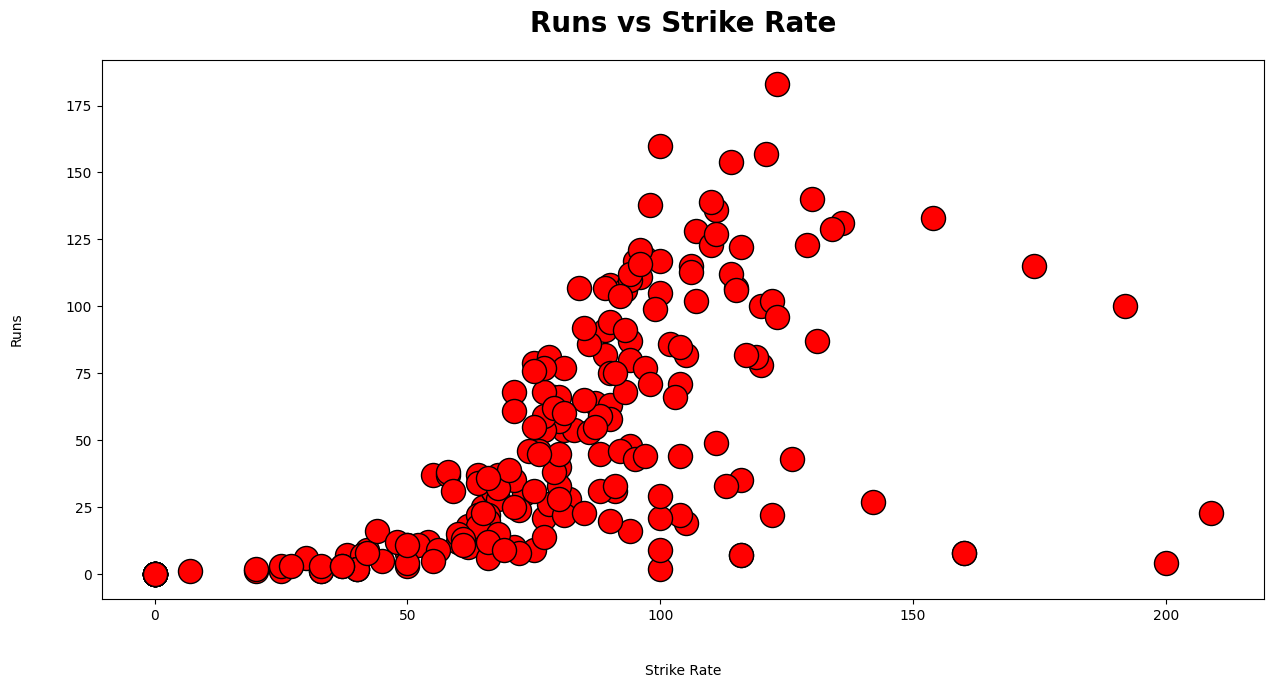

In [51]:
#strike rate vs the score of player in each match
plt.figure(figsize=(15,7))
x = induvidual_player['SR']
y = induvidual_player['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='red', s=300, edgecolor='black')
plt.show()

In [52]:
bowler_df.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5514,5515,10.0,0,39,1,3.90,39.00,60.0,v South Africa,The Oval,11 Jun 2017,ODI # 3886,Ravindra Jadeja,234675
1363,1364,2.0,0,4,0,2.00,-,-,v New Zealand,Cardiff,9 Jun 2013,ODI # 3366,Thisara Perera,233514
9777,9778,-,-,-,-,-,-,-,v West Indies,Providence,5 Jun 2016,ODI # 3740,Steve Smith,267192
6522,6523,-,-,-,-,-,-,-,v West Indies,Port of Spain,8 Jun 2011,ODI # 3160,Rohit Sharma,34102
1236,1237,-,-,-,-,-,-,-,v Pakistan,Sharjah,23 Oct 2017,ODI # 3930,Milinda Siriwardana,222354


In [53]:
bowler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11118 non-null  int64 
 1   Overs       11118 non-null  object
 2   Mdns        11118 non-null  object
 3   Runs        11118 non-null  object
 4   Wkts        11118 non-null  object
 5   Econ        11118 non-null  object
 6   Ave         11118 non-null  object
 7   SR          11118 non-null  object
 8   Opposition  11118 non-null  object
 9   Ground      11118 non-null  object
 10  Start Date  11118 non-null  object
 11  Match_ID    11118 non-null  object
 12  Bowler      11118 non-null  object
 13  Player_ID   11118 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [54]:
bowler_df.drop(bowler_df[bowler_df.Overs == '-'].index, inplace=True)
bowler_df.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0,75,0,7.50,-,-,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619


In [55]:
bowler_df.shape

(5848, 14)

In [56]:
bowler_df['Mdns'] = bowler_df['Mdns'].str.replace('-', '0')
bowler_df['Runs'] = bowler_df['Runs'].str.replace('-', '0')
bowler_df['Wkts'] = bowler_df['Wkts'].str.replace('-', '0')
bowler_df['Econ'] = bowler_df['Econ'].str.replace('-', '0')
bowler_df['Ave'] = bowler_df['Ave'].str.replace('-', '0')
bowler_df['SR'] = bowler_df['SR'].str.replace('-', '0')

In [57]:
bowler_df['Overs'] = bowler_df['Overs'].astype(float)
bowler_df['Mdns'] = bowler_df['Mdns'].astype(float)
bowler_df['Runs'] = bowler_df['Runs'].astype(float)
bowler_df['Wkts'] = bowler_df['Wkts'].astype(float)
bowler_df['Econ'] = bowler_df['Econ'].astype(float)
bowler_df['Ave'] = bowler_df['Ave'].astype(float)
bowler_df['SR'] = bowler_df['SR'].astype(float)
bowler_df.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

## Highest Number of Wickets

In [58]:
bowler_df.loc[bowler_df['Wkts']==bowler_df['Wkts'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2056,2057,9.0,0.0,45.0,7.0,5.00,6.42,7.7,v West Indies,Basseterre,15 Jun 2016,ODI # 3747,Imran Tahir,40618
4933,4934,10.0,3.0,34.0,7.0,3.40,4.85,8.5,v West Indies,Christchurch,23 Dec 2017,ODI # 3944,Trent Boult,277912
5044,5045,9.0,0.0,33.0,7.0,3.66,4.71,7.7,v England,Wellington,20 Feb 2015,ODI # 3607,Tim Southee,232364
11034,11035,8.4,1.0,18.0,7.0,2.07,2.57,7.4,v West Indies,Gros Islet,9 Jun 2017,ODI # 3884,Rashid Khan,793463


## Highest Number of Madiens 

In [59]:
bowler_df.loc[bowler_df['Mdns']==bowler_df['Mdns'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
67,68,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Suranga Lakmal,49619
193,194,10.0,4.0,28.0,3.0,2.80,9.33,20.0,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,Kemar Roach,230553
200,201,6.0,4.0,14.0,1.0,2.33,14.00,36.0,v Pakistan,Providence,16 Jul 2013,ODI # 3390,Kemar Roach,230553
867,868,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v Pakistan,Providence,14 Jul 2013,ODI # 3389,Jason Holder,391485
982,983,10.0,4.0,37.0,2.0,3.70,18.50,30.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Nuwan Pradeep,324358
2231,2232,8.0,4.0,19.0,0.0,2.37,0.00,0.0,v Bangladesh,Dhaka,14 Mar 2008,ODI # 2692,Dale Steyn,47492
4952,4953,10.0,4.0,21.0,5.0,2.10,4.20,12.0,v India,Hamilton,31 Jan 2019,ODI # 4091,Trent Boult,277912
5320,5321,9.0,4.0,23.0,1.0,2.55,23.00,54.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Mohammed Shami,481896
5644,5645,8.0,4.0,24.0,2.0,3.00,12.00,24.0,v Sri Lanka,Port of Spain,11 Jul 2013,ODI # 3388,Bhuvneshwar Kumar,326016
9052,9053,10.0,4.0,13.0,1.0,1.30,13.00,60.0,v Scotland,Chattogram,15 Dec 2006,ODI # 2465,Shakib Al Hasan,56143


## Gathering Data of one opponent induvidually

In [60]:
opponent = bowler_df.query('Opposition =="v India"')
opponent

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0.0,57.0,0.0,7.12,0.0,0.0,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0.0,55.0,2.0,5.50,27.5,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
4,5,8.0,1.0,48.0,0.0,6.00,0.0,0.0,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0.0,75.0,0.0,7.50,0.0,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619
12,13,10.0,1.0,67.0,1.0,6.70,67.0,60.0,v India,Dhaka,13 Mar 2012,ODI # 3259,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,10737,10.0,0.0,40.0,2.0,4.00,20.0,30.0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Mohammad Nabi,25913
10821,10822,5.0,0.0,25.0,0.0,5.00,0.0,0.0,v India,Dhaka,5 Mar 2014,ODI # 3483,Dawlat Zadran,516561
11005,11006,10.0,0.0,53.0,2.0,5.30,26.5,30.0,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Aftab Alam,440963
11059,11060,9.5,0.0,41.0,2.0,4.16,20.5,29.5,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Rashid Khan,793463


In [61]:
print("The maximum runs conceeded against this team is: ")
print(bowler_df.loc[bowler_df['Runs'].max()])
print("-------------------------------------------------")
print("The maximum maidens conceeded against this team is: ")
print(bowler_df.loc[bowler_df['Mdns'].max()])
print("-------------------------------------------------")
print("The maximum Wickets taken against this team is: ")
print(bowler_df.loc[bowler_df['Wkts'].max()])
print("-------------------------------------------------")
print("The maximum Economy maintained against this team is: ")
print(bowler_df.loc[bowler_df['Econ'].max()])

The maximum runs conceeded against this team is: 
Unnamed: 0              107
Overs                   4.0
Mdns                    0.0
Runs                   21.0
Wkts                    0.0
Econ                   5.25
Ave                     0.0
SR                      0.0
Opposition      v Australia
Ground            Kingstown
Start Date      16 Mar 2012
Match_ID         ODI # 3262
Bowler        Andre Russell
Player_ID            276298
Name: 106, dtype: object
-------------------------------------------------
The maximum maidens conceeded against this team is: 
Unnamed: 0                 5
Overs                    8.0
Mdns                     1.0
Runs                    48.0
Wkts                     0.0
Econ                     6.0
Ave                      0.0
SR                       0.0
Opposition           v India
Ground                 Dhaka
Start Date        5 Jan 2010
Match_ID          ODI # 2938
Bowler        Suranga Lakmal
Player_ID              49619
Name: 4, dtype: object
-

## Top 20 ballers with highest macthes/data

In [62]:
new = bowler_df['Bowler'].value_counts()[:20]
new

Shoaib Malik         213
Lasith Malinga       212
Mashrafe Mortaza     209
Shakib Al Hasan      195
Chris Gayle          195
Mohammad Hafeez      169
Angelo Mathews       154
Ravindra Jadeja      147
Thisara Perera       144
Tim Southee          137
Mahmudullah          132
JP Duminy            131
Dale Steyn           124
Mohammad Nabi        107
Bhuvneshwar Kumar    104
Imran Tahir           96
Rubel Hossain         95
Jason Holder          93
Moeen Ali             89
Kemar Roach           84
Name: Bowler, dtype: int64

In [63]:
induvidual_bowler = bowler_df.query('Bowler =="Ravindra Jadeja"')
induvidual_bowler

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5383,5384,6.0,0.0,40.0,0.0,6.66,0.00,0.0,v Sri Lanka,Colombo (RPS),8 Feb 2009,ODI # 2818,Ravindra Jadeja,234675
5384,5385,7.0,1.0,34.0,0.0,4.85,0.00,0.0,v West Indies,Kingston,26 Jun 2009,ODI # 2852,Ravindra Jadeja,234675
5385,5386,2.0,0.0,12.0,0.0,6.00,0.00,0.0,v West Indies,Kingston,28 Jun 2009,ODI # 2853,Ravindra Jadeja,234675
5386,5387,9.0,0.0,39.0,1.0,4.33,39.00,54.0,v Australia,Vadodara,25 Oct 2009,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0.0,35.0,3.0,5.38,11.66,13.0,v Australia,Nagpur,28 Oct 2009,ODI # 2915,Ravindra Jadeja,234675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,5530,9.0,0.0,53.0,0.0,5.88,0.00,0.0,v Australia,Melbourne,18 Jan 2019,ODI # 4079,Ravindra Jadeja,234675
5530,5531,10.0,0.0,33.0,0.0,3.30,0.00,0.0,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,Ravindra Jadeja,234675
5531,5532,10.0,0.0,48.0,1.0,4.80,48.00,60.0,v Australia,Nagpur,5 Mar 2019,ODI # 4106,Ravindra Jadeja,234675
5532,5533,10.0,0.0,64.0,0.0,6.40,0.00,0.0,v Australia,Ranchi,8 Mar 2019,ODI # 4109,Ravindra Jadeja,234675


## Storing the data into variables

In [64]:
x = induvidual_bowler['Overs']
y1 = induvidual_bowler['Mdns']
y2 = induvidual_bowler['Runs']
y3 = induvidual_bowler['Wkts']
y4 = induvidual_bowler['Econ']
y5 = induvidual_bowler['Ave']
y6 = induvidual_bowler['SR']

## Plotting the varuous graphs with Overs as X axis to understand the complete performance of a bowler

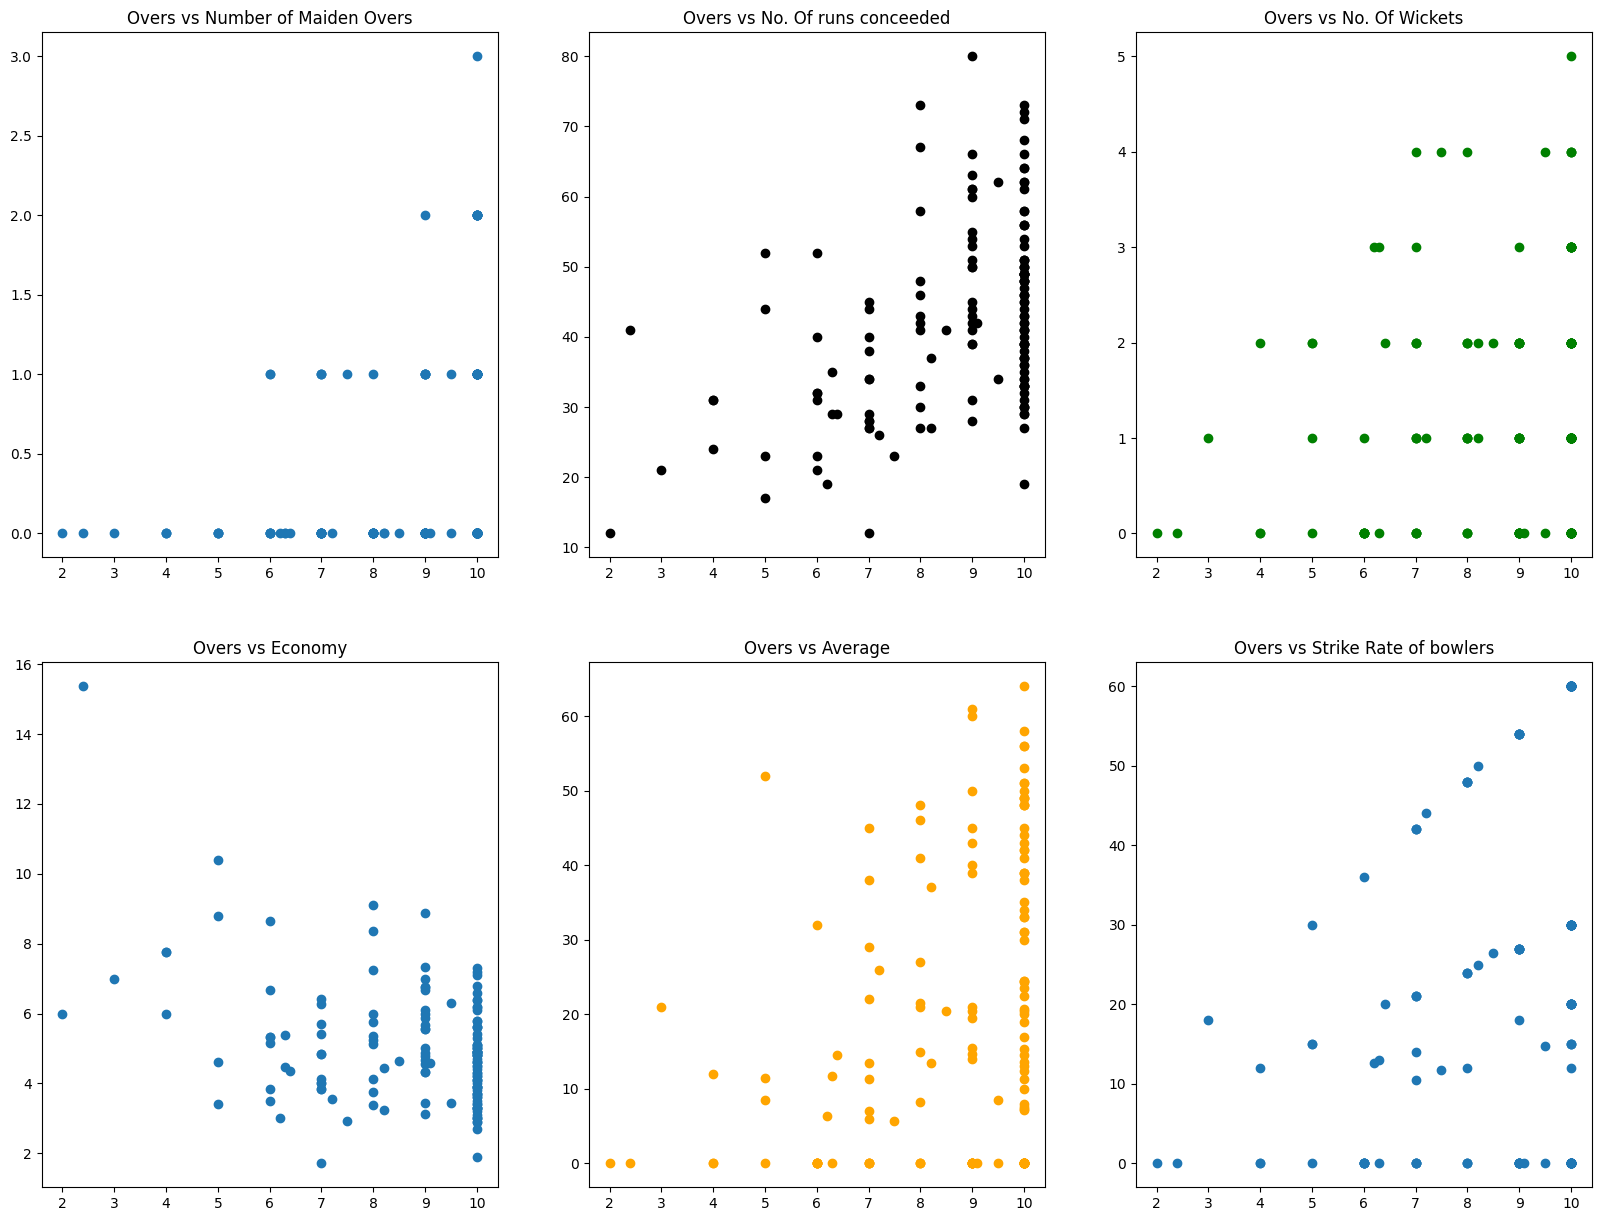

In [65]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
ax1.scatter(x, y1)
ax1.set_title('Overs vs Number of Maiden Overs')
ax2.scatter(x, y2, color='black')
ax2.set_title('Overs vs No. Of runs conceeded')
ax3.scatter(x, y3, color='green')
ax3.set_title('Overs vs No. Of Wickets')
ax4.scatter(x, y4)
ax4.set_title('Overs vs Economy')
ax5.scatter(x, y5, color='orange')
ax5.set_title('Overs vs Average')
ax6.scatter(x, y6)
ax6.set_title('Overs vs Strike Rate of bowlers')
plt.show()

## Gathering Data of one opponent induvidually

In [66]:
bdf_induvidual_opponence = induvidual_bowler.query('Opposition =="v Pakistan"')
bdf_induvidual_opponence

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5410,5411,10.0,0.0,43.0,1.0,4.30,43.00,60.0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Ravindra Jadeja,234675
5441,5442,10.0,1.0,41.0,3.0,4.10,13.66,20.0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Ravindra Jadeja,234675
5442,5443,10.0,2.0,19.0,1.0,1.90,19.00,60.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Ravindra Jadeja,234675
5450,5451,8.0,1.0,30.0,2.0,3.75,15.00,24.0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Ravindra Jadeja,234675
5482,5483,10.0,1.0,61.0,0.0,6.10,0.00,0.0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Ravindra Jadeja,234675
5494,5495,10.0,0.0,56.0,1.0,5.60,56.00,60.0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Ravindra Jadeja,234675
5512,5513,8.0,0.0,43.0,2.0,5.37,21.50,24.0,v Pakistan,Birmingham,4 Jun 2017,ODI # 3878,Ravindra Jadeja,234675
5516,5517,8.0,0.0,67.0,0.0,8.37,0.00,0.0,v Pakistan,The Oval,18 Jun 2017,ODI # 3894,Ravindra Jadeja,234675
5520,5521,9.0,0.0,50.0,0.0,5.55,0.00,0.0,v Pakistan,Dubai (DSC),23 Sep 2018,ODI # 4044,Ravindra Jadeja,234675
